# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, DS-–ø–æ—Ç–æ–∫
## –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –∑–∞–¥–∞–Ω–∏–µ 9. –ö—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è

In [392]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot 
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.diagnostic import lilliefors
from collections import Counter
from tqdm.notebook import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'
alpha = 0.05

%matplotlib inline
sns.set(style='ticks', font_scale=1.7)

___
### –ó–∞–¥–∞—á–∞ 1.

–í—Å–ø–æ–º–Ω–∏–º –Ω–µ–¥–∞–≤–Ω–µ–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–µ, –∑–∞–¥–∞–Ω–∏–µ 3.8, –∑–∞–¥–∞—á–∞ 3, –≤ –∫–æ—Ç–æ—Ä–æ–º —Å—Ä–∞–≤–Ω–∏–≤–∞–ª–∏—Å—å –≤–∞—à–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü–µ–Ω—ã –Ω–∞ –∂–∏–ª—å–µ –ø–æ –∏–º–µ—é—â–∏–º—Å—è –¥–∞–Ω–Ω—ã–º .

–í–æ–∑—å–º–∏—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤–∞—à–µ–π –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –∏–∑ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è (–µ—Å–ª–∏ –Ω–µ –æ—Ç—Å—ã–ª–∞–ª–∏, —Ç–æ –∏–∑ –∑–∞–¥–∞—á–∏ 2 —Ç–æ–≥–æ –∂–µ –∑–∞–¥–∞–Ω–∏—è). –î–ª—è –º–µ—Ç—Ä–∏–∫ MSE, MAE, MAPE –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –±—É—Ç—Å—Ç—Ä–µ–ø–Ω—ã–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã —Ç—Ä–µ—Ö —Ç–∏–ø–æ–≤.

**–†–µ—à–µ–Ω–∏–µ:**

In [201]:
target_predictions = pd.read_csv('./results.csv').price
test_target = pd.read_csv('./test_target.csv').price

In [202]:
mse = mean_squared_error(test_target, target_predictions)
mae = mean_absolute_error(test_target, target_predictions)
mape = mean_absolute_percentage_error(test_target, target_predictions)

*–ù–∞—Ö–æ–¥–∏–º –±—É—Ç—Å—Ç—Ä–µ–ø–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏*

In [284]:
n = test_target.shape[0]
B = 10000
values = target_predictions

bootstrap_mses = [mean_squared_error(np.random.choice(values, n), test_target) for _ in range(B)]
bootstrap_maes = [mean_absolute_error(np.random.choice(values, n), test_target) for _ in range(B)]
bootstrap_mapes = [mean_absolute_percentage_error(np.random.choice(values, n), test_target) for _ in range(B)]

In [281]:
def normal_ci(bootstrap_stats, estimate):
    """–°—Ç—Ä–æ–∏—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª."""
    z = sps.norm.ppf(1 - alpha / 2)
    se = np.std(bootstrap_stats)
    left, right = estimate - z * se, estimate + z * se
    return left, right

def central_ci(bootstrap_stats, estimate):
    """–°—Ç—Ä–æ–∏—Ç —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª."""
    left, right= 2 * estimate - np.quantile(bootstrap_stats, [1 - alpha / 2,  alpha / 2])
    return left, right

def quantile_ci(bootstrap_stats):
    """–°—Ç—Ä–æ–∏—Ç –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å–Ω—ã–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª."""
    left, right = np.quantile(bootstrap_stats, [alpha / 2, 1 - alpha / 2])
    return left, right

In [285]:
normal_cis, central_cis, quantile_cis = [], [], []
metrics = [mse, mae, mape]
bootstrap_metrics = [bootstrap_mses, bootstrap_maes, bootstrap_mapes]

for metric, bootstrap_metric in zip(metrics, bootstrap_metrics):
    normal_cis.append(normal_ci(bootstrap_metric, metric))
    central_cis.append(central_ci(bootstrap_metric, metric))
    quantile_cis.append(quantile_ci(bootstrap_metric))

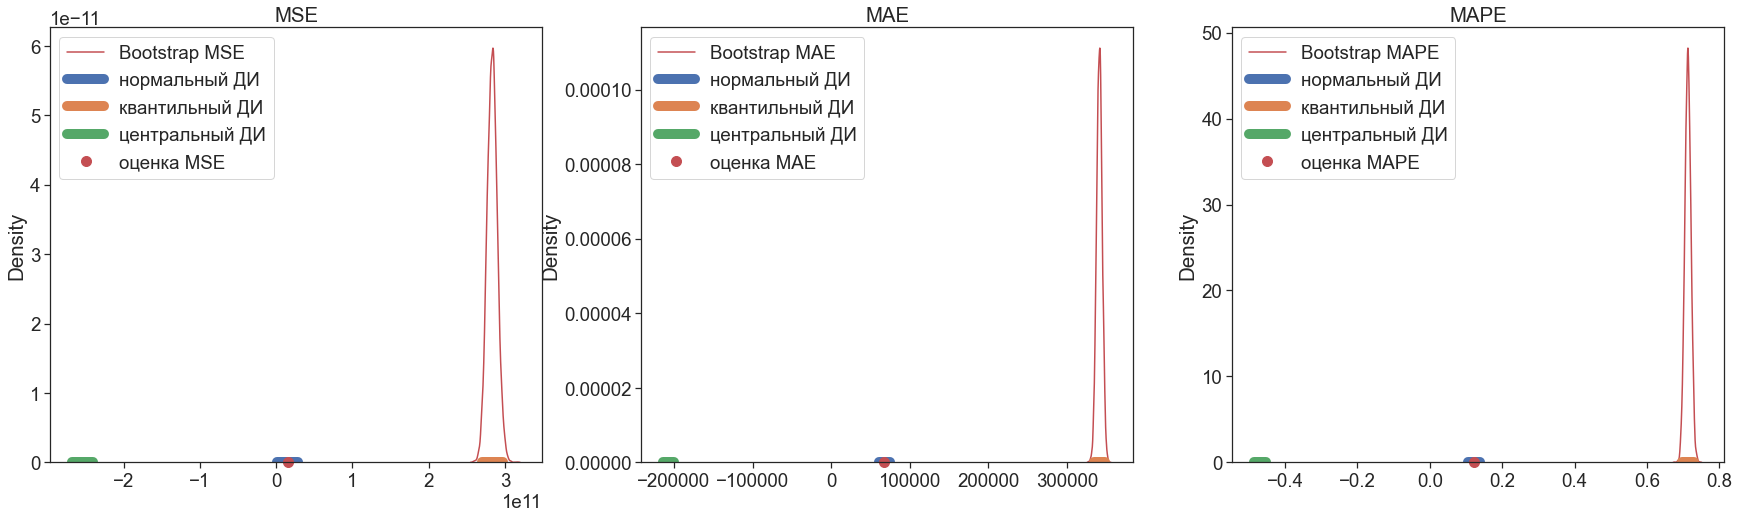

In [286]:
d = 0.01
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
labels = ['MSE', 'MAE', 'MAPE']
for i in range(3):
    sns.kdeplot(bootstrap_metrics[i], ax=ax[i], c='r', label=f'Bootstrap {labels[i]}')
    ax[i].plot(normal_cis[i], [0, 0], label='–Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –î–ò', lw=10)
    ax[i].plot(quantile_cis[i], [0, 0], label='–∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–π –î–ò', lw=10)
    ax[i].plot(central_cis[i], [0, 0], label='—Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π –î–ò', lw=10)
    ax[i].plot([metrics[i]], [0], 'o', c='r', markersize=10, label=f'–æ—Ü–µ–Ω–∫–∞ {labels[i]}', clip_on=False)
    ax[i].legend()
    ax[i].set_title(labels[i]);

**–í—ã–≤–æ–¥:** *–í–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—É—Ç—Å—Ç—Ä–µ–ø–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É, –ø–æ—ç—Ç–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –î–ò –≤–æ –≤—Å–µ—Ö —Å–ª—É—á–∞—è—Ö –ø–æ–∫—Ä—ã–≤–∞–µ—Ç –æ—Ü–µ–Ω–∫—É –º–µ—Ç—Ä–∏–∫–∏. –û—Å—Ç–∞–ª—å–Ω—ã–µ –±—É—Ç—Å—Ç—Ä–µ–ø–Ω—ã–µ –î–ò (—Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ) –∏—Ö –Ω–µ –ø–æ–∫—Ä—ã–≤–∞—é—Ç, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ —Ä–∞–±–æ—Ç–∞—é—Ç –≤–µ—Ä–Ω–æ –¥–ª—è –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫. –û–¥–Ω–∞–∫–æ –≤–æ –≤—Å–µ—Ö 3—Ö —Å–ª—É—á–∞—è—Ö –æ—Ü–µ–Ω–∫–∞ –º–µ—Ç—Ä–∏–∫–∏ –ª–µ–∂–∏—Ç –≤–Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±—É—Ç—Å—Ä–µ–ø–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫. –î—É–º–∞—é —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –±—É—Ç—Å—Ç—Ä–µ–ø–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –æ—à–∏–±–∫—É –º–µ–∂–¥—É –±—É—Ç—Å—Ç—Ä–µ–ø–Ω—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º –∏ —Ç–∞—Ä–≥–µ—Ç–æ–º*  

___
### –ó–∞–¥–∞—á–∞ 3.

–°—Ç—É–¥–µ–Ω—Ç—ã –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ –æ—Ç–ø—Ä–∞–≤–ª—è—é—Ç –∑–∞–ø—Ä–æ—Å—ã –≤ –±–æ—Ç. –ò–Ω–æ–≥–¥–∞ –±–æ—Ç –±—ã–≤–∞–µ—Ç –Ω–µ–¥–æ—Å—Ç—É–ø–µ–Ω,
–ø–æ—ç—Ç–æ–º—É —Å—Ç—É–¥–µ–Ω—Ç—ã —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏ –ø–æ–≤—Ç–æ—Ä—è—é—Ç –∑–∞–ø—Ä–æ—Å—ã –¥–æ —Ç–µ—Ö –ø–æ—Ä, –ø–æ–∫–∞
–±–æ—Ç –Ω–µ –æ—Ç–≤–µ—Ç–∏—Ç. –ò–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ $52$ –∑–∞–ø—Ä–æ—Å–∞ –¥–æ—à–ª–∏ —Å –ø–µ—Ä–≤–æ–π –ø–æ–ø—ã—Ç–∫–∏, $31$ &mdash; —Å–æ –≤—Ç–æ—Ä–æ–π, $3$
&mdash; —Å —Ç—Ä–µ—Ç—å–µ–π, –∞ –¥–ª—è –¥–æ—Å—Ç–∞–≤–∫–∏ –µ—â–µ $5$ –∑–∞–ø—Ä–æ—Å–æ–≤ –ø–æ—Ç—Ä–µ–±–æ–≤–∞–ª–æ—Å—å –±–æ–ª–µ–µ $4$ –ø–æ–ø—ã—Ç–æ–∫. –í–µ—Ä–Ω–æ
–ª–∏, —á—Ç–æ –±–æ—Ç –ø–æ–ª—É—á–∞–µ—Ç –∑–∞–ø—Ä–æ—Å—ã —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $\frac{2}{3}$?

**–†–µ—à–µ–Ω–∏–µ:**

*1 —Å–ø–æ—Å–æ–±*

*–ü–æ–ø—Ä–æ–±—É–µ–º —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç. –†–∞—Å—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª—É—á–∞–π–Ω—É—é –≤–µ–ª–∏—á–∏–Ω—É - –Ω–æ–º–µ—Ä –ø–µ—Ä–≤–æ–≥–æ —É—Å–ø–µ—à–Ω–æ–≥–æ –∏—Å–ø—ã—Ç–∞–Ω–∏—è –≤ —Å—Ö–µ–º–µ –ë–µ—Ä–Ω—É–ª–ª–∏ —Å –∑–∞–¥–∞–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —É—Å–ø–µ—Ö–∞, —Ç–æ –µ—Å—Ç—å –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –Ω–æ–º–µ—Ä –ø–µ—Ä–≤–æ–π —É—Å–ø–µ—à–Ω–æ–π –ø–æ—Å—ã–ª–∫–∏. –¢–∞–∫–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ –∏–º–µ–µ—Ç **–≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ**. –ü—É—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è p = 2/3. –†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ 52 + 31 + 3 + 5 = 91.*

In [22]:
p = 2/3
samples = sps.geom(p).rvs(size=(1000, 91))

In [17]:
p

0.6666666666666666

*–î–æ–ª–∏ —Å–æ–æ–±—â–µ–Ω–∏–π, –¥–æ—à–µ–¥—à–∏—Ö —Å 1, 2, 3, 4 –∏ –±–æ–ª–µ–µ –ø–æ–ø—ã—Ç–æ–∫ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ:*

In [65]:
np.hstack(((52/91), (31/91), (3/91), (5/91)))

array([0.57142857, 0.34065934, 0.03296703, 0.05494505])

In [39]:
unique = np.unique(samples, return_counts=True)
unique

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([60832, 20022,  6784,  2188,   807,   238,    92,    25,    10,
            2]))

In [62]:
one_to_tree_tries = unique[1][:3]
four_and_more_tries = np.array([unique[1][3:].sum()])
total = samples.shape[0] * samples.shape[1]

*–û—Ü–µ–Ω–∫–∏ –¥–æ–ª–∏ —Å–æ–æ–±—â–µ–Ω–∏–π, –¥–æ—à–µ–¥—à–∏—Ö —Å 1, 2, 3, 4 –∏ –±–æ–ª–µ–µ –ø–æ–ø—ã—Ç–æ–∫ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ:*

In [63]:
np.hstack((one_to_tree_tries, four_and_more_tries)) / total

array([0.66848352, 0.22002198, 0.07454945, 0.03694505])

*–î–æ–ª–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –∑–∞–¥–∞–Ω–Ω—ã—Ö, –∑–Ω–∞—á–∏—Ç –Ω–µ–≤–µ—Ä–Ω–æ —á—Ç–æ –±–æ—Ç –ø–æ–ª—É—á–∞–µ—Ç —Å–æ–æ–±—â–µ–Ω–∏—è —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 2/3*

*2 —Å–ø–æ—Å–æ–±: –±—É—Ç—Å—Ç—Ä–µ–ø*

In [72]:
n = 91
sample = [1]*52 + [2]*31 + [3]*3 + [4]*5

In [118]:
bootstrap_samples = np.array([np.random.choice(sample, size=n) for _ in range(1000)])

*–ü–æ–ª—É—á–∏–º –≤—ã–±–æ—Ä–æ—á–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ:*

In [120]:
bootstrap_samples.mean(axis=1).mean()

1.570945054945055

*–ü–æ —Å–≤–æ–π—Å—Ç–≤—É –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $E_x = 1/p$, –∑–Ω–∞—á–∏—Ç $\widehat{p} = 1 / \overline{x}$*

In [122]:
p_estim = 1 / bootstrap_samples.mean(axis=1).mean()
p_estim

0.6365595008254288

*–û—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —É—Å–ø–µ—Ö–∞ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –∑–∞–¥–∞–Ω–Ω–æ–π*

*–í –ø–µ—Ä–≤—ã—Ö 2—Ö —Å–ø–æ—Å–æ–±–∞—Ö –ø–æ–ª—É—á–µ–Ω—ã –æ—Ü–µ–Ω–∫–∏, –∏ —Å–¥–µ–ª–∞–Ω—ã –≤—ã–≤–æ–¥—ã, –Ω–æ –Ω–µ—Ç —Å—Ç–µ–ø–µ–Ω–∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –≤—ã–≤–æ–¥–∞—Ö, —Ç–æ –µ—Å—Ç—å –Ω–∞ —Å–∫–æ–ª—å–∫–æ –¥–æ–ª–∂–Ω–∞ –æ—Ç–ª–∏—á–∞—Ç—å—Å—è –æ—Ü–µ–Ω–∫–∞ –æ—Ç —Ä–µ–∞–ª—å–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞, —á—Ç–æ–±—ã –≥–æ–≤–æ—Ä–∏—Ç—å —á—Ç–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –Ω–µ–≤–µ—Ä–Ω–æ. –î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑*

*3 —Å–ø–æ—Å–æ–±: –∫—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç*

*H0: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ - Geom(2/3) vs H1: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ - –Ω–µ Geom(2/3)*

In [124]:
sps.chisquare([52, 31, 3, 5])

Power_divergenceResult(statistic=71.59340659340658, pvalue=1.9454036234728723e-15)

*p-value < 0.05 => –æ—Ç–≤–µ—Ä–≥–∞–µ–º H0. –•–æ—Ç—è –∏–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –ø—Ä–∏–º–µ–Ω–∏–º –ø—Ä–∏ —Ä–∞–∑–º–µ—Ä–µ –±–∞–∫–µ—Ç–∞ >= 5, –µ–≥–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –ü—Ä–∏–º–µ–Ω–∏–º –ö—Ä–∏—Ç–µ—Ä–∏–π –∫–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –∫ —Ç–æ–π –∂–µ –ø–∞—Ä–µ –≥–∏–ø–æ—Ç–µ–∑:*

In [137]:
np.random.shuffle(sample)
sps.kstest(sample, sps.geom(p=2/3).cdf)

KstestResult(statistic=0.6666666666666666, pvalue=2.3332944673244494e-40)

***p-value < 0.05 => –æ—Ç–≤–µ—Ä–≥–∞–µ–º H0***

**–í—ã–≤–æ–¥:** *–ë–æ—Ç –ø–æ–ª—É—á–∞–µ—Ç –∑–∞–ø—Ä–æ—Å—ã —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –ù–ï 2/3, –∞ –∫–∞–∫–æ–π-—Ç–æ –¥—Ä—É–≥–æ–π. –í —Ü–µ–ª–æ–º –º–æ–∂–Ω–æ –±—ã–ª–æ —Å—Ä–∞–∑—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏, –ø—Ä–æ—Å—Ç–æ –º–Ω–µ –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Ä–∞—Å—Å—É–∂–¥–∞—Ç—å, –µ—Å–ª–∏ –≤ —ç—Ç–æ–º –µ—Å—Ç—å –æ—à–∏–±–∫–∏ –Ω–∞–ø–∏—à–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞. –¢–∞–∫ –∂–µ, —Ö–æ—Ç—è –≤ –º–æ–µ–º —Å–ª—É—á–∞–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –¥–∞–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –Ω–∞–¥–æ —Å–ª–µ–¥–∏—Ç—å –∑–∞ –∏—Ö –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç—å—é.*

____
### –ó–∞–¥–∞—á–∞ 4.

–° –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç –≤–∞–º –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏ `scipy.stats` –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã. 

**1.** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏ $U\{1, ..., 10\}$, –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ä–∞–∑–æ–±—Ä–∞–Ω–Ω–æ–º—É –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ. –¢–µ–º —Å–∞–º—ã–º –ø—Ä–æ–≤–µ—Ä—å—Ç–µ, —á—Ç–æ `sps.randint` –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –≤—ã–±–æ—Ä–∫—É –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

<...>

**2.** –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –∫–æ–¥ `sps.poisson(mu=5).rvs(size=1000)` –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –≤—ã–±–æ—Ä–∫—É —Ä–∞–∑–º–µ—Ä–∞ 1000 –∏–∑ –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º 5. 

**–£–∫–∞–∑–∞–Ω–∏—è**
1. –ù–µ –∑–∞–±—É–¥—å—Ç–µ —É—á–µ—Å—Ç—å —É—Å–ª–æ–≤–∏—è –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç;
2. –î–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –≤–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å `sps.poisson(mu=5).pmf`;
3. –î–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –≤–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å `np.unique(sample, return_counts=True)`;
4. –ù–µ –Ω—É–∂–Ω–æ –ø–∏—Å–∞—Ç—å —Å–∫–æ–ª—å-–ª–∏–±–æ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –∫–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –æ–¥–Ω–∏–º –Ω–∞–∂–∞—Ç–∏–µ–º –∫–Ω–æ–ø–∫–∏ –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –≥–∏–ø–æ—Ç–µ–∑—É —Å —É—á–µ—Ç–æ–º –≤—Å–µ—Ö —É—Å–ª–æ–≤–∏–π –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è. –†–∞—Å–ø–∏—Å—ã–≤–∞–π—Ç–µ –∫–æ–¥ –ø–æ—ç—Ç–∞–ø–Ω–æ, –Ω–∞ –∫–∞–∂–¥—ã–π –ª–æ–≥–∏—á–µ—Å–∫–∏–π —ç—Ç–∞–ø —Å–≤–æ–π –∫–æ–¥ –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–π —è—á–µ–π–∫–µ –¥–ª—è *–∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π* —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏. –¢–∞–∫ –≤–∞–º –ø—Ä–æ—â–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å, –∞ –Ω–∞–º –ø—Ä–æ—â–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å.
**–†–µ—à–µ–Ω–∏–µ:**

*1. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º H0: $P = U\{1, .., 10\}$. –¢—É—Ç –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç, —Ç–∞–∫ –∫–∞–∫ —Å—Ä–µ–¥–Ω–∏–π —Ä–∞–∑–º–µ—Ä –±–∞–∫–µ—Ç–∞ = 1000/ 10 = 100*

In [379]:
n = 1000
sample = sps.randint(1, 11).rvs(size=n)
unique_cnt = np.unique(sample, return_counts=True)
unique_cnt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 92,  85, 106, 108, 116,  99, 104, 100,  94,  96]))

In [380]:
sps.chisquare(unique_cnt[1])

Power_divergenceResult(statistic=7.140000000000001, pvalue=0.6225460056339922)

*p-value > 0.05 => H0 –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.*

*2. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –ü—Ä–æ–≤–µ—Ä–∏–º —É—Å–ª–æ–≤–∏–µ –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç*

In [384]:
sample = sps.poisson(mu=5).rvs(size=n)

In [385]:
unique_cnt = np.unique(sample, return_counts=True)
unique_cnt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15]),
 array([  6,  34,  79, 148, 165, 160, 158, 104,  86,  33,  15,   6,   3,
          2,   1]))

*–í–∏–¥–∏–º, —á—Ç–æ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –±–∞–∫–µ—Ç–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç –º–µ–Ω—å—à–µ 5 —ç–ª–µ–º–µ—Ç–æ–≤. –û–±—ä–µ–¥–∏–Ω–∏–º 3 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –±–∞–∫–µ—Ç–∞ –≤ –æ–¥–∏–Ω, –ø–æ–ª—É—á–∏–º 12 –±–∞–∫–µ—Ç–æ–≤*

In [386]:
unique_cnt_ok = unique_cnt[1][:11]
last_bucket = unique_cnt[1][11:].sum()
buckets = np.hstack((unique_cnt_ok, [last_bucket]))
buckets

array([  6,  34,  79, 148, 165, 160, 158, 104,  86,  33,  15,  12])

*–¢–µ–ø–µ—Ä—å —Ç–∞–∫–∂–µ –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å –æ–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:* 

In [387]:
f_exp = sps.poisson(mu=5).pmf(np.arange(12)) * n
f_exp[-1] += sps.poisson(mu=5).sf(11) * n

In [389]:
sps.chisquare(buckets, f_exp)

Power_divergenceResult(statistic=11.383530925868696, pvalue=0.41171386916773456)

*p-value > 0.05 => H0 –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.*

*–ï—Å–ª–∏ –±—ã –Ω–µ –≤—ã–ø–æ–ª–Ω–∏–ª–∏ —É—Å–ª–æ–≤–∏–µ –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç–∏:*

In [390]:
sps.chisquare(unique_cnt[1])

Power_divergenceResult(statistic=900.5299999999997, pvalue=3.324181244783821e-183)

**–í—ã–≤–æ–¥:** *–í –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö –Ω–µ –æ—Ç–≤–µ—Ä–≥–ª–∏ –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ scipy –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≥–µ–Ω–µ—Ä–∏—Ç –∑–∞–¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç. –¢–∞–∫–∂–µ –≤–∞–∂–Ω–æ —Å–ª–µ–¥–∏—Ç—å –∑–∞ –µ–≥–æ –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç—å—é, —Ç–∞–∫ –∫–∞–∫ –µ—Å–ª–∏ –±—ã –≤–æ –≤—Ç–æ—Ä–æ–º –ø—Ä–∏–º–µ—Ä–µ –Ω–µ –æ–±—ä–µ–¥–∏–Ω–∏–ª–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –±–∞–∫–µ—Ç—ã, –ø–æ–ª—É—á–∏–ª–∏ –±—ã p-value < 0.05 –∏ –º–æ–≥–ª–∏ –±—ã –æ—à–∏–±–æ—á–Ω–æ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É.*



__________________
### –ó–∞–¥–∞—á–∞ 5.

–ù–∞ –ª–µ–∫—Ü–∏—è—Ö –∏ —Å–µ–º–∏–Ω–∞—Ä–∞—Ö –±—ã–ª–∏ —Ä–∞–∑–æ–±—Ä–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏:
* –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞;
* –ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞;
* –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞.

C—É—â–µ—Å—Ç–≤—É–µ—Ç –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ ‚Äî <a href="https://ru.wikipedia.org/wiki/–ö—Ä–∏—Ç–µ—Ä–∏–π_–õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞"> –ö—Ä–∏—Ç–µ—Ä–∏–π –õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞.</a> –ü—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ –∑–∞–¥–∞—á–∏ –º–æ–∂–µ—Ç–µ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∏–º, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤–∑—è–≤ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, –∏–ª–∏ –∂–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π $F_0$ –∫—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞, –ø—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–æ—Ç–æ—Ä–æ–≥–æ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –≤ –Ω–æ—É—Ç–±—É–∫–µ —Å –ª–µ–∫—Ü–∏–∏.

**1.** –î–∞–Ω–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —è–≤–ª—è—é—Ç—Å—è –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏–º–∏, –∏ –∏—Ö —Ä–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º–æ–∂–µ—Ç –æ—Ç–ª–∏—á–∞—Ç—å—Å—è –æ—Ç –∂–µ–ª–∞–µ–º–æ–≥–æ —á–∏—Å–ª–∞ $\alpha=0.05$. –ù–∞ —Å–µ–º–∏–Ω–∞—Ä–∞—Ö —Ä–∞–∑–æ–±—Ä–∞–Ω –º–µ—Ç–æ–¥ –æ—Ü–µ–Ω–∫–∏ —Ä–µ–∞–ª—å–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Ä–µ–∞–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —ç—Ç–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –¥–ª—è —Ä–∞–∑–º–µ—Ä–æ–≤ –≤—ã–±–æ—Ä–∫–∏ –æ—Ç 5 –¥–æ 100.

*–ü–æ–¥—Å–∫–∞–∑–∫–∞:*

In [ ]:
max_sample_size = ...
sample_count = ...
is_reject_<–∫—Ä–∏—Ç–µ—Ä–∏–π> = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<–∫—Ä–∏—Ç–µ—Ä–∏–π>[i, j] = ...

–í–∞—à–∞ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è:

In [393]:
sample_size_range = (5, 101)
sample_count = 10000
is_reject = [np.zeros((sample_size_range[1], sample_count)) for i in range(4)]
tests_name = ['–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞', '–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞', '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞', '–õ–∏–ª–ª–∏–µ—Ñ–æ—Ä—Å–∞']
tests = [sps.kstest, sps.jarque_bera, sps.shapiro, lilliefors]

In [394]:
is_reject = [np.zeros((sample_size_range[1], sample_count)) for i in range(4)]

for i in tqdm(range(*sample_size_range)):
    for j in range(sample_count):
        sample = sps.norm.rvs(size=i)
        for k in range(4):
            if k == 0:
                res = tests[k](sample, cdf=sps.norm().cdf)
            else:
                res = tests[k](sample)
            is_reject[k][i, j] = res[1] < alpha

  0%|          | 0/96 [00:00<?, ?it/s]

In [395]:
alpha_real = [0]*4
for i in range(4):
    alpha_real[i] = is_reject[i].sum(axis=1) / sample_count
    alpha_real[i] = alpha_real[i][sample_size_range[0] : sample_size_range[1]]

–ü–æ—è—Å–Ω–∏—Ç–µ, –ø–æ—á–µ–º—É –≤—ã –≤—ã–±—Ä–∞–ª–∏ —Ç–∞–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ `sample_count`.

*–ß–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –ª—É—á—à–µ) –î—É–º–∞—é –º–æ–∂–Ω–æ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –≤—ã–≤–µ—Å—Ç–∏ –∫–∞–∫–æ–π-—Ç–æ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥. –û–¥–Ω–∞–∫–æ —è –≤–∑—è–ª–∞ —Ç–∞–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–µ –Ω–æ –Ω–µ –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ*

–ù–∞—Ä–∏—Å—É–π—Ç–µ –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–∞–ª—å–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ü—É–Ω–∫—Ç–∏—Ä–æ–º –æ—Ç–º–µ—Ç—å—Ç–µ —É—Ä–æ–≤–µ–Ω—å 0.05. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –¥–æ–±–∞–≤–∏—Ç—å –ª–µ–≥–µ–Ω–¥—É –∏ –ø–æ–¥–ø–∏—Å–∞—Ç—å –æ—Å–∏.

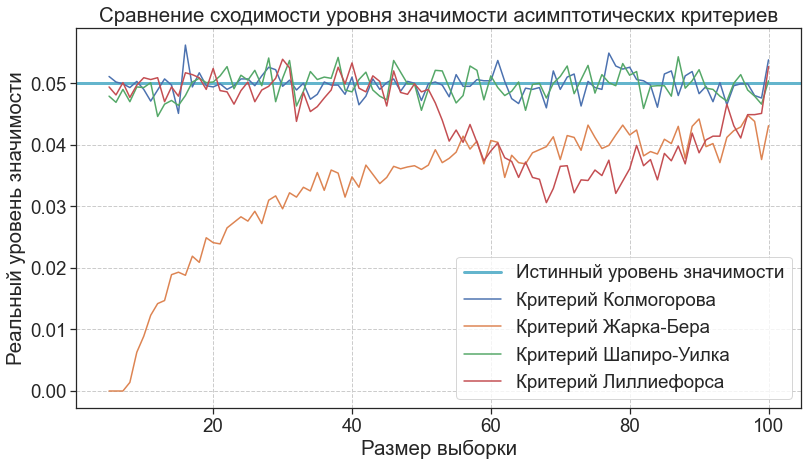

In [396]:
grid = np.arange(*sample_size_range)

plt.figure(figsize=(13, 7))
plt.axhline(alpha, color='c', lw=3, label='–ò—Å—Ç–∏–Ω–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏')

for ind, test in enumerate(tests_name):
    plt.plot(grid, alpha_real[ind], label='–ö—Ä–∏—Ç–µ—Ä–∏–π ' + test)
    
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤')
plt.xlabel('–†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏')
plt.ylabel('–†–µ–∞–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏')
plt.grid(linestyle='--')
plt.legend();

–ö–∞–∫–æ–π –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥?

*–ö—Ä–∏—Ç–µ—Ä–∏–π –ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞ –¥–∞—ë—Ç —Ä–µ–∞–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º–µ–Ω—å—à–∏–π, —á–µ–º –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏–π, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É—é—Ç —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏ –º–∞–ª–µ–Ω—å–∫–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–µ.*

**2.** –ê–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –º–æ–∂–Ω–æ –≤—ã—á–∏—Å–ª—è—Ç—å –º–æ—â–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è. –í—ã—á–∏—Å–ª–∏—Ç–µ –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –¥–ª—è —Ä–∞–∑–º–µ—Ä–æ–≤ –≤—ã–±–æ—Ä–∫–∏ –æ—Ç 5 –¥–æ 100, –µ—Å–ª–∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ—à–∏. –ò–Ω–∞—á–µ –≥–æ–≤–æ—Ä—è, –¥–ª—è –∫—Ä–∏—Ç–µ—Ä–∏—è $S$ –Ω–∞–¥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å $\beta_S(\mathsf{P})$, –≥–¥–µ $\mathsf{P}$ ‚Äî —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ—à–∏.

–ù–∞—Ä–∏—Å—É–π—Ç–µ –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –¥–æ–±–∞–≤–∏—Ç—å –ª–µ–≥–µ–Ω–¥—É –∏ –ø–æ–¥–ø–∏—Å–∞—Ç—å –æ—Å–∏.


In [405]:
is_reject = [np.zeros((sample_size_range[1], sample_count)) for i in range(4)]
for i in tqdm(range(*sample_size_range)):
    for j in range(sample_count):
        sample = sps.cauchy().rvs(size=i)
        for k in range(4):
            if k == 0:
                res = tests[k](sample, cdf=sps.norm().cdf)
            else:
                res = tests[k](sample)
            is_reject[k][i, j] = res[1] < alpha

  0%|          | 0/96 [00:00<?, ?it/s]

In [406]:
power_real = [0]*4

for i in range(4):
    power_real[i] = is_reject[i].sum(axis=1) / sample_count
    power_real[i] = power_real[i][sample_size_range[0] : sample_size_range[1]]

In [407]:
grid = np.arange(*sample_size_range)
plt.figure(figsize=(13, 7))

for i in range(4):
    plt.plot(grid, power_real[i], label=tests_name[i])

plt.grid(linestyle='--')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–µ–π –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤')
plt.xlabel('–†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏')
plt.ylabel('–ú–æ—â–Ω–æ—Å—Ç—å')
plt.legend();

–°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥. –ö–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π —è–≤–ª—è–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –º–æ—â–Ω—ã–º –ø—Ä–∏ –¥–∞–Ω–Ω–æ–π –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–µ?

*–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –Ω–∞–∏–±–æ–ª—å—à—É—é –º–æ—â–Ω–æ—Å—Ç—å –¥–∞—ë—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞. –ù–æ –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ, –Ω–µ—Ç —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–æ –ª—É—á—à–µ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è, –∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤ –Ω—É–∂–Ω–æ –≤—ã–±–∏—Ä–∞—Ç—å –ø–æ–¥—Ö–æ–¥—è—â–∏–π.*

**3.** –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞ —è–≤–ª—è–µ—Ç—Å—è –≤ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º —Å–º—ã—Å–ª–µ –æ–±–æ–±—â–µ–Ω–∏–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–ø—Ä–∏ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã) –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ö–æ—à–∏ (–ø—Ä–∏ –æ–¥–Ω–æ–π —Å—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã). 
–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ 50 –µ—Å–ª–∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞. –ü–æ—Å–∫–æ–ª—å–∫—É –º–æ—â–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è —è–≤–ª—è–µ—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏–µ–π –æ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–∑ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã, –≤–∞–º –Ω—É–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –µ—ë –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Ü–µ–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã –æ—Ç 1 –¥–æ 10.

–ù–∞—Ä–∏—Å—É–π—Ç–µ –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –¥–æ–±–∞–≤–∏—Ç—å –ª–µ–≥–µ–Ω–¥—É –∏ –ø–æ–¥–ø–∏—Å–∞—Ç—å –æ—Å–∏.

In [ ]:
<...>

–°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –∏–∑ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã.

<...>

**4.** –ê–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤, –µ—Å–ª–∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã.

In [ ]:
<...>

–°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥:

<...>

___________
### –ó–∞–¥–∞—á–∞ 6.

C–∫–∞—á–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, –≤–∑—è–≤ –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏, –∫—Ä–æ–º–µ `Class`. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥–µ–º –Ω–∞–∑—ã–≤–∞—Ç—å –∫–æ–ª–æ–Ω–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.

In [397]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [ 'Alcohol',
                 'Malic acid',
                 'Ash',
                 'Alcalinity of ash',
                 'Magnesium',
                 'Total phenols',
                 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins',
                 'Color intensity',
                 'Hue',
                 'OD280/OD315 of diluted wines',
                 'Proline']

df = pd.read_csv(url, names=columns).reset_index(drop=True)
df.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞—Ä–∏—Å—É–π—Ç–µ Q-Q plot. –î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –∏ —ç–∫–æ–Ω–æ–º–∏–∏ –º–µ—Å—Ç–∞ —Ä–∏—Å—É–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç–æ–ª–±—Ü–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è `plt.subplot`.

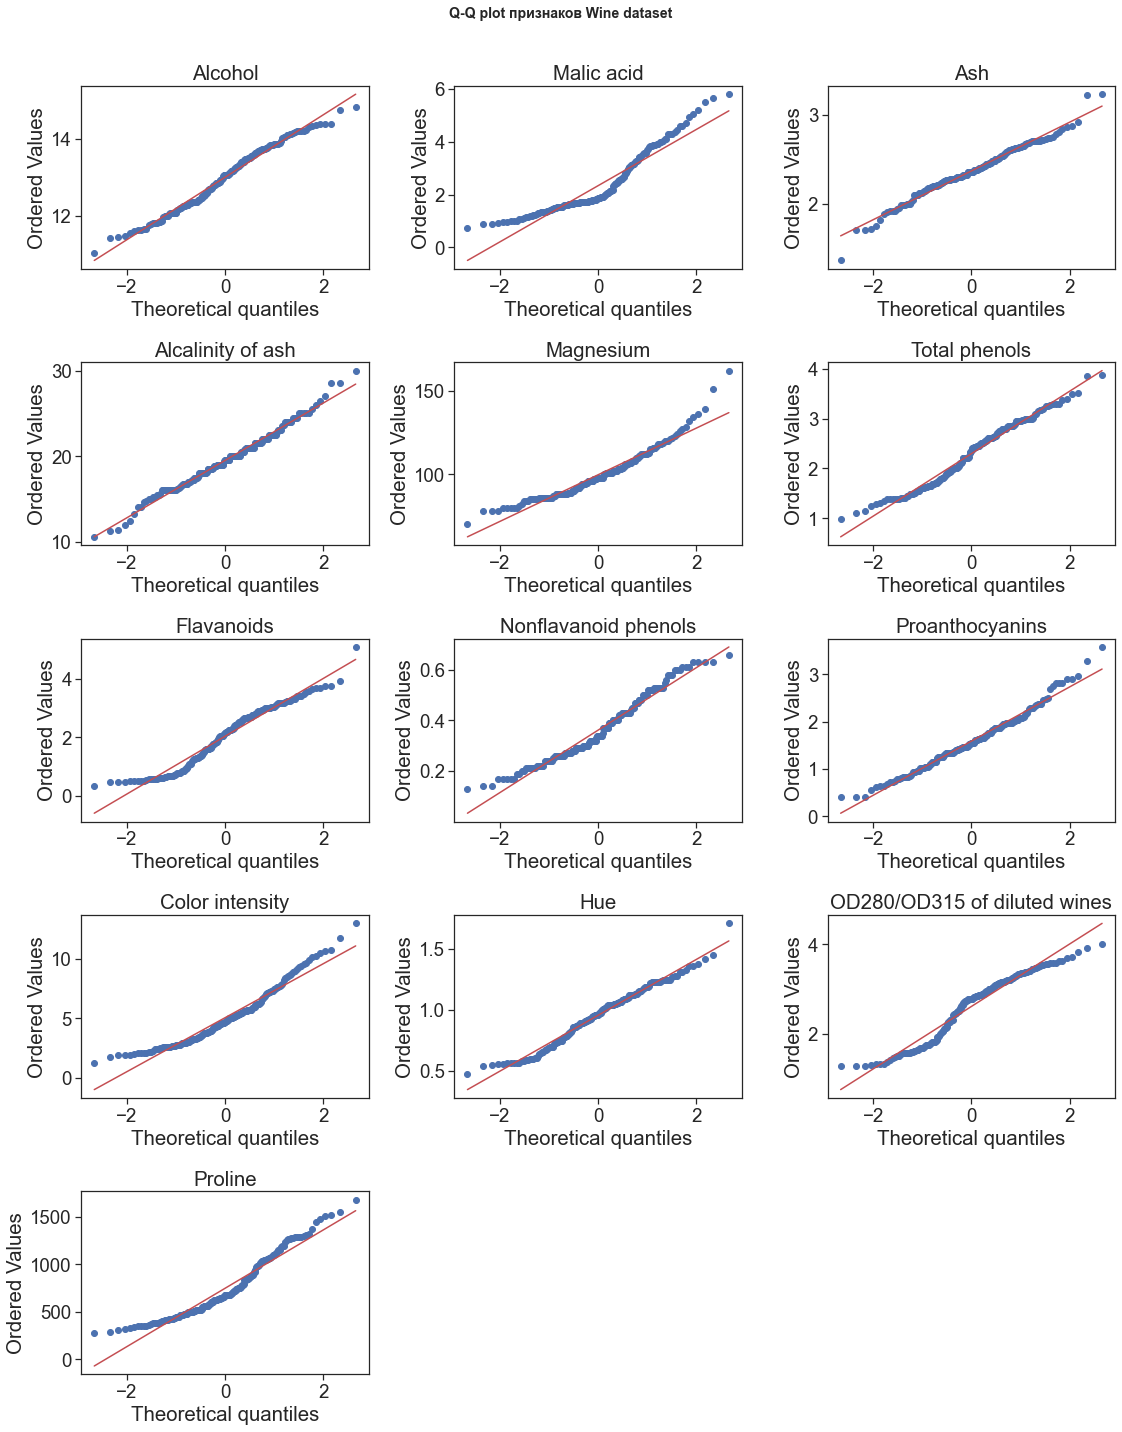

In [399]:
plt.figure(figsize=(16, 20))

for i, name in enumerate(columns):
    plt.subplot(5, 3, i + 1)
    sps.probplot(x=df[name], dist='norm', fit=True, plot=plt)
    plt.title(name)

plt.suptitle('Q-Q plot –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Wine dataset', y=1, fontweight='bold', fontsize=14)
plt.tight_layout();

–î–ª—è –∫–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–Ω–æ –≥–æ–≤–æ—Ä–∏—Ç—å –æ–± –∏—Ö –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ –ø–æ—á–µ–º—É?

**–û—Ç–≤–µ—Ç:** *–ù–∞ –≥–ª–∞–∑ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–ª–æ–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å, –Ω–æ –≤ —Ü–µ–ª–æ–º –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ **Alcohol, Ash, Alcanity of ash, Proanthocyanins –∏ Hue** –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–æ –ª–æ–∂–∞—Ç—Å—è –Ω–∞ –ø—Ä—è–º—É—é, –∑–Ω–∞—á–∏—Ç —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.*

–ü—Ä–æ–≤–µ—Ä—å—Ç–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–º–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è–º–∏. –ü—Ä–µ–∂–¥–µ —á–µ–º –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Å–ª–µ–¥—É—é—â—É—é —á–∞—Å—Ç—å –∑–∞–¥–∞—á–∏, –æ—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã. –ü–æ–º–æ—á—å –≤ —ç—Ç–æ–º –º–æ–∂–µ—Ç —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–µ –¥–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 10.

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏. –ö–∞–∫–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –≤—ã –±—É–¥–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å?

**–û—Ç–≤–µ—Ç:** *–û—Å–Ω–æ–≤–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ - —ç—Ç–æ 3 –ø–µ—Ä–≤—ã—Ö –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è. –ù–æ –¥–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –ø–æ—ç—Ç–æ–º—É –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞ –∏ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞.*

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –Ω—É–∂–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Å –ø–æ–º–æ—â—å—é *–æ–¥–Ω–æ–π* –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑ –¥–ª—è –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –≤—Å–µ—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ —Å—Ä–∞–∑—É. –ü–æ—á–µ–º—É —Ç–∞–∫ –Ω—É–∂–Ω–æ –¥–µ–ª–∞—Ç—å?

**–û—Ç–≤–µ—Ç:** *–ß—Ç–æ–±—ã –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–æ–Ω–∏—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–Ω—É –≤–µ—Ä–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Ç–æ –µ—Å—Ç—å –¥–æ–ø—É—â–µ–Ω–∏—è —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–π –æ—à–∏–±–∫–∏ 1 —Ä–æ–¥–∞, –±—ã–ª–∞ <= 5. –ü—Ä–∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –º–æ–∂–µ—Ç —É–≤–µ–ª–∏—á–∏—Ç—å—Å—è*

–ö–∞–∫–æ–π –º–µ—Ç–æ–¥ –¥–ª—è –∫–æ–Ω—Ç—Ä–æ–ª—è FWER —Å—Ç–æ–∏—Ç –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∏ –ø–æ—á–µ–º—É?

**–û—Ç–≤–µ—Ç:** *–¢–∞–∫ –∫–∞–∫ –º—ã –Ω–∏—á–µ–≥–æ –Ω–µ –∑–Ω–∞–µ–º –æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, —Ç–æ —Å—Ç–æ–∏—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å –º–µ—Ç–æ–¥ –•–æ–ª–º–∞, —Ç–∞–∫ –∫–∞–∫ –æ–Ω —Å–∞–º—ã–π –º–æ—â–Ω—ã–π –ø—Ä–∏ –≤–æ–∑–º–æ–∂–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.*

–ö–∞–∫ –ø–æ–Ω—è—Ç—å –∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑, –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –∫–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–ª–µ–¥—É–µ—Ç –æ—Ç–∫–ª–æ–Ω–∏—Ç—å?

**–û—Ç–≤–µ—Ç:** *–ü—É—Å—Ç—å H0: –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞. –î–ª—è –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π p-value >  ùõº  —Ö–æ—Ç—è –±—ã —É –æ–¥–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è, –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.*

–ï—Å–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è, —á—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ –≤—ã–±–æ—Ä–∫—É? –û—Ç–≤–µ—Ç –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –ø—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏–∏ —Å –ª–µ–∫—Ü–∏–∏.

**–û—Ç–≤–µ—Ç:** *–í —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ –≥–æ–≤–æ—Ä—è—Ç, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å –æ—Å–Ω–æ–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π, –∞ –∑–Ω–∞—á–∏—Ç –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞.*

–†–µ–∞–ª–∏–∑—É–π—Ç–µ –¥–∞–Ω–Ω—É—é —Å—Ö–µ–º—É. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —Å–æ–±–µ—Ä–∏—Ç–µ p-value –≤—Å–µ—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –≤ —Ç–∞–±–ª–∏—Ü—É. 

–§—É–Ω–∫—Ü–∏—è `multipletests` –ø—Ä–∏–Ω–∏–º–∞–µ—Ç —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–µ –º–∞—Å—Å–∏–≤—ã, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–Ω–æ–π `numpy`-—Ç–∞–±–ª–∏—Ü—ã –Ω—É–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç–æ–¥–æ–º `ravel`. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ–±–µ—Ä–∏—Ç–µ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ `reshape`, –∫–æ—Ç–æ—Ä–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–µ—Ä–µ–¥–∞—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Ç–∞–±–ª–∏—Ü—ã. –î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ —Å–¥–µ–ª–∞–π—Ç–µ —Ç–∞–±–ª–∏—Ü—É —Å –ø–æ–º–æ—â—å—é `pandas.DataFrame`. –í –∫–∞—á–µ—Å—Ç–≤–µ –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç—Ä–æ–∫ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –Ω–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤ ‚Äî –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏. –í —Ç–∞–±–ª–∏—Ü–µ –¥–æ–ª–∂–Ω—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–æ–≤–æ–≤–∞—Ç—å –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è p-value, —Ç–∞–∫ –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏ (`True` –≤ —Å–ª—É—á–∞–µ –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏—è).

In [400]:
shapiro = df.apply(sps.shapiro).iloc[1, :]
jarque_bera = df.apply(sps.jarque_bera).iloc[1, :]
crits = pd.DataFrame()
crits['–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞'] = jarque_bera
crits['–®–∞–ø–∏—Ä–æ'] = shapiro
crits

–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞        –®–∞–ø–∏—Ä–æ
Alcohol                       6.106775e-02  2.005172e-02
Malic acid                    1.115426e-07  2.945930e-10
Ash                           8.485917e-03  3.868526e-02
Alcalinity of ash             2.509338e-01  2.638694e-01
Magnesium                     6.883383e-15  6.345416e-07
Total phenols                 6.312188e-02  4.395752e-03
Flavanoids                    5.273120e-02  1.679064e-05
Nonflavanoid phenols          1.071359e-02  1.055266e-04
Proanthocyanins               7.840977e-03  1.445338e-02
Color intensity               1.092262e-05  9.229477e-07
Hue                           6.012442e-01  1.742566e-02
OD280/OD315 of diluted wines  3.087748e-03  2.316050e-06
Proline                       1.393770e-04  1.741221e-07

In [402]:
crits = multipletests(crits.values.ravel(), method='holm')[1]
crits = crits.reshape((-1, 2))
crits = pd.DataFrame(crits, columns=['–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞', '–®–∞–ø–∏—Ä–æ'], index=columns)
rejected = crits <  0.05
rejected

–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞  –®–∞–ø–∏—Ä–æ
Alcohol                            False   False
Malic acid                          True    True
Ash                                False   False
Alcalinity of ash                  False   False
Magnesium                           True    True
Total phenols                      False   False
Flavanoids                         False    True
Nonflavanoid phenols               False    True
Proanthocyanins                    False   False
Color intensity                     True    True
Hue                                False   False
OD280/OD315 of diluted wines        True    True
Proline                             True    True

*–û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞—é—Ç—Å—è –∫—Ä–∏—Ç–µ—Ä–∏—è–º–∏*

In [403]:
rejected.loc[(rejected['–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞'] == False) & (rejected['–®–∞–ø–∏—Ä–æ'] == False)]

–ñ–∞—Ä–∫–∞-–ë–µ—Ä–∞  –®–∞–ø–∏—Ä–æ
Alcohol                 False   False
Ash                     False   False
Alcalinity of ash       False   False
Total phenols           False   False
Proanthocyanins         False   False
Hue                     False   False

–î–ª—è –∫–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è?

**–û—Ç–≤–µ—Ç:** *–ü–æ–ª—É—á–∏–ª–∏, —á—Ç–æ –ø–æ–º–∏–º–æ  Alcohol, Ash, Alcanity of ash, Proanthocyanins –∏ Hue, –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è –∏ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ Total phenols.*

**–í—ã–≤–æ–¥:** *–í–∏–∑—É–∞–ª—å–Ω–æ –ø–æ Q-Q plot –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤–æ–∑–º–æ–∂–Ω–æ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ —Ç–æ—á–Ω–æ. –ß–∞—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —è –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–ª–∞, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –æ–∫–∞–∑–∞–ª–∏—Å—å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏, –Ω–æ –ø–æ—Å–ª–µ –ú–ü–ì —É–≤–∏–¥–µ–ª–∏, —á—Ç–æ –µ—â–µ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ - Total phenols. –¢–æ –µ—Å—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä—è –ú–ü–ì –º—ã —É–º–µ–Ω—å—à–∞–µ–º –≤–∞—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—à–∏–±–∫–∏ 1 —Ä–æ–¥–∞.*